In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [2]:
# 读取MOOC数据集
data = pd.read_csv(r"C:\Users\33549\Desktop\21000126181695120509.csv")
data

,session_user_id,locale,timezone,access_group_id,registration_time,last_access_time,email_announcement,email_forum,in_signature_track,wishes_proctored_exam,...,lecture_item_views,quiz_score_sum,forum_posts_count,forum_posts_votes,forum_comments_count,forum_comments_votes,forum_reputation,grade,video_views,page_views
0,000cc0e5f08e0fc842a130f2ec7f53bce1d98f64,en_US,Asia/Shanghai,4,1383636486,1383636717,1,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,12.0
1,001d085171a760c78e9b7db9a9c54e2ce753d1b8,en_US,America/Los_Angeles,4,1384413682,1384835182,1,1,0,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,8.0,46.0
2,00212a1c5d801642f948c9c27cdeaf2567f2d213,en_US,America/Los_Angeles,4,1387686473,1387945675,1,1,0,NaN,...,28.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,384.0,65.0
3,00255c057658b4b5a53a56484e2972c9cfa4a751,en_US,America/Los_Angeles,4,1386733431,1386733440,1,1,0,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,213.0,23.0
4,002a01769248bbc5481a15406671b2b4f5287140,en_US,America/Los_Angeles,4,1379258951,1380471724,1,1,0,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,3.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12684,ffe7ccb174f8e11778e8dd696fb93f5bdff327a9,en_US,America/Los_Angeles,4,1381305566,1389705669,1,1,0,NaN,...,86.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,177.0,172.0
12685,ffec3494fff9a06271eda14bc2607007965d342b,en_US,America/Los_Angeles,4,1381325175,1381325180,1,1,0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.0,4.0
12686,fff38ef5172f064c47996fbcf59ee13c5e39409b,en_US,America/Los_Angeles,4,1386696661,1387587394,1,1,0,NaN,...,42.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,281.0,95.0
12687,fff719bdd4bed288b323f37f33b68beb662d2c08,en_US,America/Los_Angeles,4,1379041261,1382419360,1,1,0,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,6.0,12.0


In [3]:
# 选择数值型的列进行相关系数计算
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

# 删除 grade 列
numeric_columns.remove('grade')

# 计算相关系数
correlation_matrix = data[numeric_columns].corrwith(data['grade'])

# 保留相关系数大于0.1的列
correlation_df = pd.DataFrame(correlation_matrix[abs(correlation_matrix) > 0.1], columns=['Correlation with Grade'])
print(tabulate(correlation_df, headers='keys', tablefmt='pretty'))

# 筛选相关系数大于0.1的列
selected_columns = correlation_matrix[abs(correlation_matrix) > 0.1].index

+----------------------+------------------------+
|                      | Correlation with Grade |
+----------------------+------------------------+
|   last_access_time   |  0.26231234500996126   |
|       duration       |  0.42451778995698863   |
|      begin_time      |  -0.16419644345423884  |
|    total_actions     |   0.6549388940143915   |
| assignment_score_sum |   0.980114476026383    |
|  lecture_item_views  |   0.3214152856749906   |
|    quiz_score_sum    |   0.853687677157159    |
|  forum_posts_count   |  0.21528690019920338   |
|  forum_posts_votes   |  0.11375347586269119   |
| forum_comments_count |  0.21612798815658907   |
|     video_views      |   0.3615077916700441   |
|      page_views      |   0.7931244438882151   |
+----------------------+------------------------+


C:\Users\33549\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\33549\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [4]:
# 做数据清洗，去掉离群值
def remove_top_three(df):
    for col in df.columns:
        if df[col].dtype != 'object' and col != 'grade':
            top_three = df.nlargest(3, col)[col].index  # Get the indices of top three max values
            df = df[~df.index.isin(top_three)]  # Remove rows with these indices
    return df

# 保留所有数值行并删除每列最大的三个数所在的行
data = remove_top_three(data)

data

,session_user_id,locale,timezone,access_group_id,registration_time,last_access_time,email_announcement,email_forum,in_signature_track,wishes_proctored_exam,...,lecture_item_views,quiz_score_sum,forum_posts_count,forum_posts_votes,forum_comments_count,forum_comments_votes,forum_reputation,grade,video_views,page_views
18,0070fe44518e6a8b7b5cc3bafbd82c843c491a36,en_US,America/Los_Angeles,4,1388318741,1390231791,1,1,0,NaN,...,57.0,3.0,NaN,NaN,NaN,NaN,NaN,0.000000,278.0,278.0
19,007b32961a7db0df79a2e205e4c48190c8e464a8,en_US,America/Los_Angeles,4,1381420834,1386426447,1,1,0,NaN,...,85.0,NaN,1.0,0.0,NaN,NaN,NaN,0.000000,40.0,78.0
20,008b9a1fbec4940dcfdfc40f9e4d8dda36a7d2d3,en_US,America/Los_Angeles,4,1381244543,1381244555,1,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,2.0
21,008e1c31edb69ef502711fa5c5ab932f9698bf6e,en_US,America/Los_Angeles,4,1384960719,1385176945,1,1,0,NaN,...,75.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,11.0,54.0
22,0092428eefc4db9f88d949049fac15843f5bc974,en_US,America/Los_Angeles,4,1380625818,1381241279,1,1,0,NaN,...,7.0,0.0,NaN,NaN,NaN,NaN,NaN,0.000000,91.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12684,ffe7ccb174f8e11778e8dd696fb93f5bdff327a9,en_US,America/Los_Angeles,4,1381305566,1389705669,1,1,0,NaN,...,86.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,177.0,172.0
12685,ffec3494fff9a06271eda14bc2607007965d342b,en_US,America/Los_Angeles,4,1381325175,1381325180,1,1,0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.0,4.0
12686,fff38ef5172f064c47996fbcf59ee13c5e39409b,en_US,America/Los_Angeles,4,1386696661,1387587394,1,1,0,NaN,...,42.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,281.0,95.0
12687,fff719bdd4bed288b323f37f33b68beb662d2c08,en_US,America/Los_Angeles,4,1379041261,1382419360,1,1,0,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,6.0,12.0


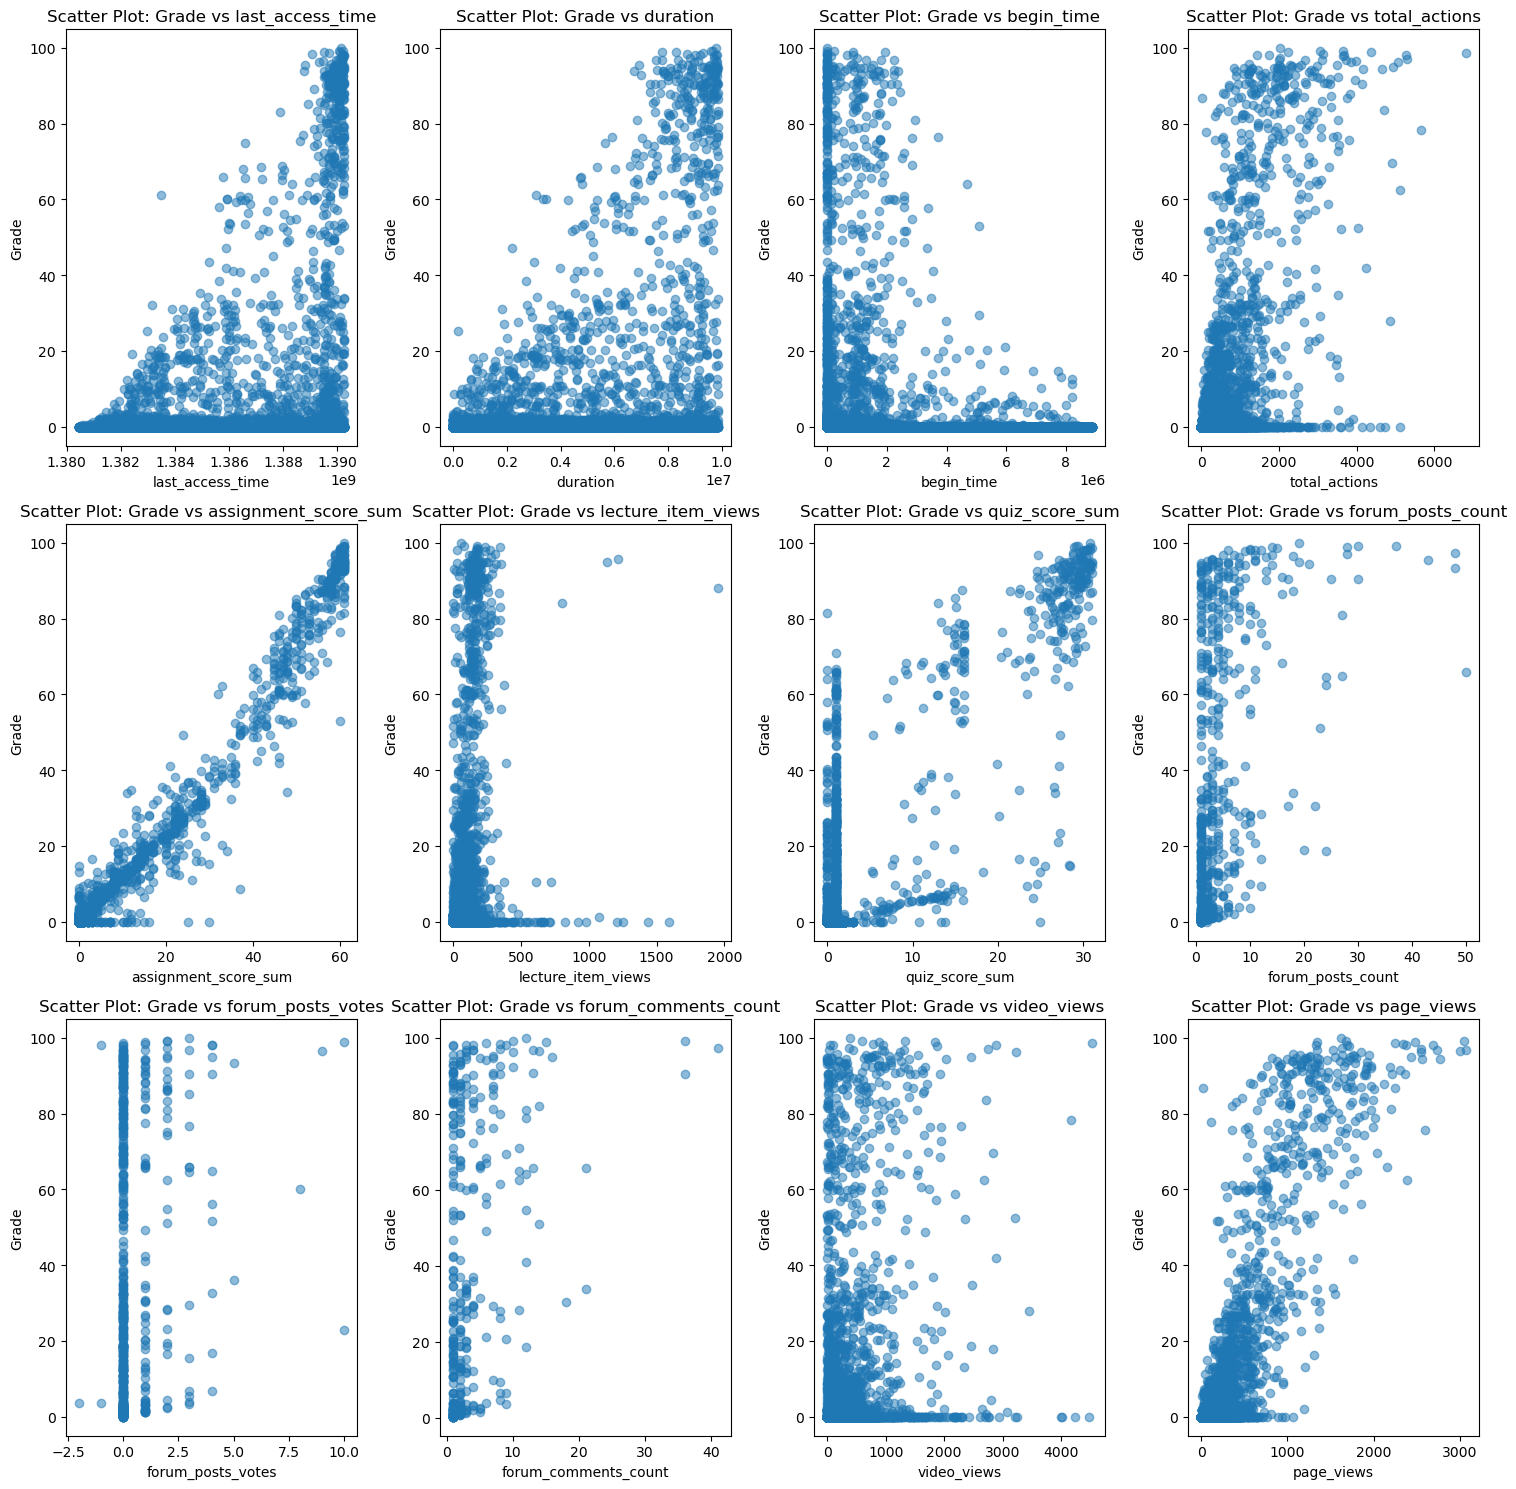

In [5]:
# 设置子图的行数和列数
num_rows = 3
num_cols = 4

# 绘制散点图
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))  # 设置画布大小

for i, col in enumerate(selected_columns):
    axs.flatten()[i].scatter(data[col], data['grade'], alpha=0.5)
    axs.flatten()[i].set_xlabel(col)
    axs.flatten()[i].set_ylabel('Grade')
    axs.flatten()[i].set_title(f'Scatter Plot: Grade vs {col}')

plt.tight_layout()
plt.show()

In [32]:
# 用均值填补缺失值
data['assignment_score_sum'].fillna(0, inplace=True)
data['quiz_score_sum'].fillna(0, inplace=True)
data['page_views'].fillna(0, inplace=True)
data['grade'].fillna(0, inplace=True)
data['video_views'].fillna(0, inplace=True)
data['total_actions'].fillna(0, inplace=True)


C:\Users\33549\AppData\Local\Temp\ipykernel_1216\2885548582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['assignment_score_sum'].fillna(0, inplace=True)
C:\Users\33549\AppData\Local\Temp\ipykernel_1216\2885548582.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['quiz_score_sum'].fillna(0, inplace=True)
C:\Users\33549\AppData\Local\Temp\ipykernel_1216\2885548582.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat

In [24]:
data=data[data['grade']!=0]
data

,session_user_id,locale,timezone,access_group_id,registration_time,last_access_time,email_announcement,email_forum,in_signature_track,wishes_proctored_exam,...,lecture_item_views,quiz_score_sum,forum_posts_count,forum_posts_votes,forum_comments_count,forum_comments_votes,forum_reputation,grade,video_views,page_views
23,00975dd9569cac0d16b864def4f4ed6bfdf0f353,en_US,Asia/Shanghai,4,1378819753,1387791525,1,1,0,NaN,...,17.0,0.000000,1.0,0.0,NaN,NaN,NaN,0.333333,22.0,45.0
30,00aa4bb15f3854dbde1458ba4801b48fe601a0ec,en_US,Asia/Hong_Kong,4,1379135147,1389686259,1,1,0,NaN,...,134.0,26.000000,NaN,NaN,NaN,NaN,NaN,89.547200,19.0,691.0
31,00b4f614fe1621ec24bbb7d6f32618fc27e363f3,en_US,Asia/Shanghai,4,1380609256,1384573012,1,1,0,NaN,...,12.0,1.000000,NaN,NaN,NaN,NaN,NaN,17.971000,85.0,147.0
44,010076d2a0976212485109a77077a08f13cf67ce,en_US,America/Los_Angeles,4,1380548592,1382359349,1,1,0,NaN,...,82.0,1.000000,NaN,NaN,NaN,NaN,NaN,1.166670,59.0,102.0
60,015d0f199c74c56794c618eedd82ddd7cc0ee50b,en_US,Asia/Hong_Kong,4,1379599626,1382377595,1,1,0,NaN,...,22.0,1.000000,NaN,NaN,NaN,NaN,NaN,1.666670,127.0,176.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12654,ff4c05578ade7c34ecfd47aa20b8a992af36742c,en_US,America/Los_Angeles,4,1382955149,1389490639,1,1,0,NaN,...,1.0,0.000000,NaN,NaN,NaN,NaN,NaN,51.521700,10.0,209.0
12664,ff89c87b9b4c9adf4cf5389edb98db06e736f97d,en_US,Asia/Taipei,4,1380027191,1385981839,1,1,0,NaN,...,31.0,1.000000,NaN,NaN,NaN,NaN,NaN,53.775400,113.0,678.0
12674,ffae2314f521483088d6664819aa12e35585c9d8,en_US,Asia/Shanghai,4,1380500665,1381877724,1,1,0,NaN,...,31.0,1.000000,NaN,NaN,NaN,NaN,NaN,1.583330,49.0,88.0
12679,ffd3d34af996157fb3aae2f64d62b364f31d34ac,en_US,Asia/Taipei,4,1379836592,1384827689,1,1,0,NaN,...,62.0,1.000000,NaN,NaN,NaN,NaN,NaN,17.971000,62.0,317.0


In [25]:
#用sklearn做回归分析
from sklearn.linear_model import LinearRegression

# 准备数据
X = data[['assignment_score_sum', 'quiz_score_sum', 'video_views']]  # 自变量
y = data['grade']  # 因变量

# 创建线性回归模型
model = LinearRegression()

# 拟合模型
model.fit(X, y)

# 输出回归系数和截距
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [1.11142232 1.04431639 0.00339543]
Intercept: -8.468409194841836


In [30]:
#用statsmodels做回归分析
import statsmodels.api as sm

# 准备数据
X = data[['assignment_score_sum', 'quiz_score_sum', 'page_views']]  # 自变量
y = data['grade']  # 因变量
# 添加截距项
X = sm.add_constant(X)

# 创建并拟合线性回归模型
model = sm.OLS(y, X).fit()

# 输出回归结果摘要
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  grade   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     6436.
Date:                Sun, 12 Nov 2023   Prob (F-statistic):               0.00
Time:                        02:12:55   Log-Likelihood:                -5635.4
No. Observations:                1597   AIC:                         1.128e+04
Df Residuals:                    1593   BIC:                         1.130e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -8.8043 

In [33]:
import statsmodels.api as sm

# 准备数据
X = data[['total_actions','video_views']]  # 自变量
y = data['grade']  # 因变量
# 添加截距项
X = sm.add_constant(X)

# 创建并拟合线性回归模型
model = sm.OLS(y, X).fit()

# 输出回归结果摘要
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  grade   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     2281.
Date:                Sun, 12 Nov 2023   Prob (F-statistic):               0.00
Time:                        02:17:16   Log-Likelihood:                -6612.0
No. Observations:                1597   AIC:                         1.323e+04
Df Residuals:                    1594   BIC:                         1.325e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.0172      0.523      1.944